In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import wine_prep
from model_functions import *
from plotting_functions import nn_plot_mse, nn_plot_mse_many
import no_gpu
import reproducible
from sklearn.metrics import mean_squared_error

In [4]:
import time

In [5]:
X_train, X_test, y_train, y_test = wine_prep()

In [6]:
layers = 4
neurons = [32, 32, 16, 1]
n_cols = X_train.shape[1]
batch_size = X_train.shape[0]      # X_train.shape[0]
epochs = 30
optimizer = "sgd"

Epoch 1/30
1/1 [==============================] - 0s 136ms/step - loss: 23.6868 - mse: 23.6868 - val_loss: 17.7512 - val_mse: 17.7512
Epoch 2/30
1/1 [==============================] - 0s 16ms/step - loss: 17.8216 - mse: 17.8216 - val_loss: 13.9138 - val_mse: 13.9138
Epoch 3/30
1/1 [==============================] - 0s 31ms/step - loss: 14.0044 - mse: 14.0044 - val_loss: 10.6003 - val_mse: 10.6003
Epoch 4/30
1/1 [==============================] - 0s 94ms/step - loss: 10.6933 - mse: 10.6933 - val_loss: 7.5193 - val_mse: 7.5193
Epoch 5/30
1/1 [==============================] - 0s 22ms/step - loss: 7.6118 - mse: 7.6118 - val_loss: 4.8879 - val_mse: 4.8879
Epoch 6/30
1/1 [==============================] - 0s 31ms/step - loss: 4.9841 - mse: 4.9841 - val_loss: 3.0441 - val_mse: 3.0441
Epoch 7/30
1/1 [==============================] - 0s 38ms/step - loss: 3.1358 - mse: 3.1358 - val_loss: 2.0647 - val_mse: 2.0647
Epoch 8/30
1/1 [==============================] - 0s 31ms/step - loss: 2.1451 - ms

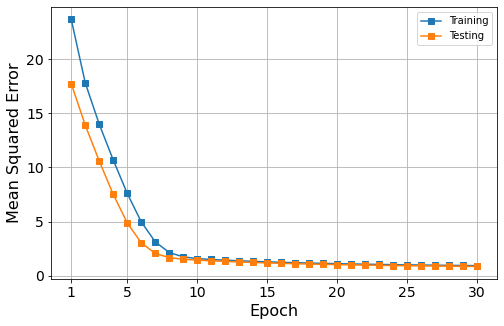

In [7]:
model = nn_model_structure(layers = layers,
                           neurons = neurons,
                           n_cols = n_cols,
                           classification = False)
model = nn_model_compile(model,
                         optimizer = optimizer)
start_time = time.time()
model = nn_model_fit(model,
                     X_train,
                     y_train,
                     X_val = X_test,
                     y_val = y_test,
                     batch_size = batch_size,
                     epochs = epochs)
end_time = time.time()
print("Overall calculation took {} seconds.".format(end_time - start_time))
model.summary()
nn_plot_mse(model,
            mse_mean = None,
            start_epoch = 1,
            savefig = True,
            file = "../img/wine/wine_{}_E{}_B{}.png".format(optimizer, epochs, batch_size))
nn_save(model,
        "../models/wine/wine_{}_E{}_B{}.h5".format(optimizer, epochs, batch_size))